<h1 align="center">Facial Recognition With EigenFaces Algorithm</h1>

    Jonathan Merrill

In [1]:
#import packages
import os
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt
import random
from scipy import linalg

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

In [34]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    picture = np.reshape(image,(m,n))  #reshape the image
    plt.imshow(picture, cmap = "gray")  #graph it with gray scale
    plt.show()

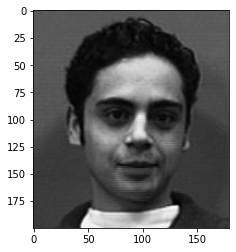

In [36]:
i = random.randint(0,152)  #get a random number between 0 and 152
image = get_faces()[:,i]   #show that number of face
show(image)

In [8]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        self.F = get_faces()
        self.mu = np.mean(self.F,axis = 1)   #find the mean face (mean as in average...these people look nice)
        self.Fbar = self.F.copy()            #find Fbar in more than one line 
        self.Fbar = self.Fbar.transpose()
        self.Fbar -= self.mu
        self.Fbar = self.Fbar.transpose()
        self.U,S,vh = linalg.svd(self.Fbar, full_matrices = False)  #find U using the linalg svd function 

    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        return (self.U[:,:s]).T@A

    
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        gbar = g - self.mu  #find gbar
        F_hat = self.project(self.Fbar,s)   #find fhat using fbar
        g_hat = self.project(gbar,s)      #find ghat using gbar
        check = []
        for image in range(len(F_hat[0])):  #cycle through the images 
            check.append(linalg.norm(F_hat[:,image] - g_hat))
        face = np.argmin(check)  #return the min 
        return face

    
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        i = self.find_nearest(image,s)  #use the find nearest function to find the nearest image
        show(image)   #show that image
        show(self.F[:,i])   #show F of that image as well (the same thing)

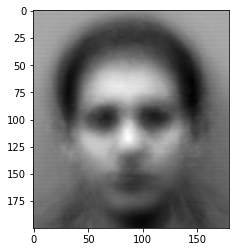

In [9]:
A = FacialRec()
show(A.mu)
#this is what the mean face looks like 

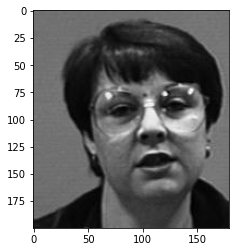

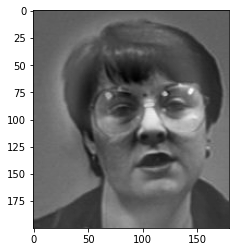

In [10]:
show(A.F[:,0])
show(A.Fbar[:,0])
#this is the original face, and then the original minus the mean face. She looks much happier without the mean doesn't she?

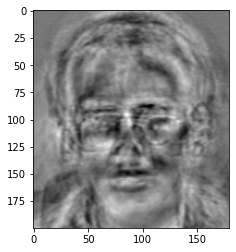

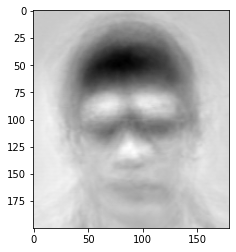

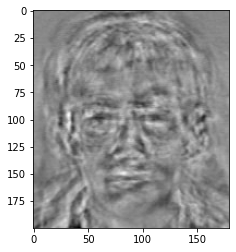

In [11]:
face = FacialRec()
show(face.U[:,50])
show(face.U[:,1])
show(face.U[:,100])
#plots of the eigen faces with different values. 50, 1, then 100. Interesting to see the change. 

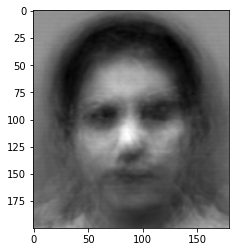

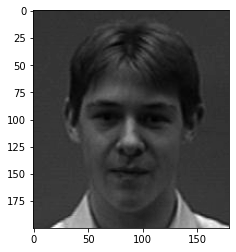

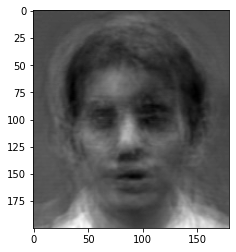

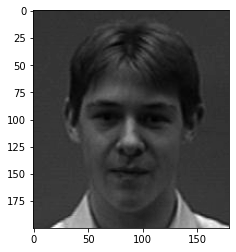

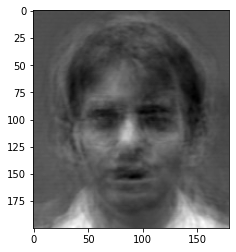

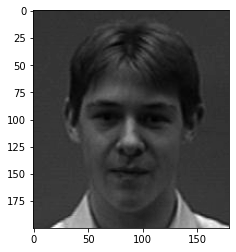

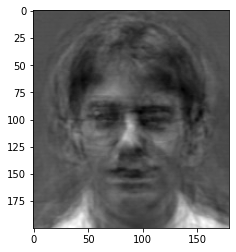

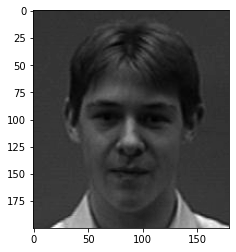

In [12]:
face = FacialRec()
for i in [1,20,40,80]:
    U_S = face.project(face.Fbar[:,50],i)  #use the project function to find the projection and the reconstruction
    show(face.U[:,:i]@U_S + face.mu) #display the reconstructed images (shown next to the original)
    show(face.F[:,50])

Pair  1


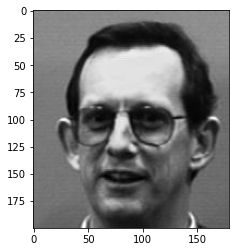

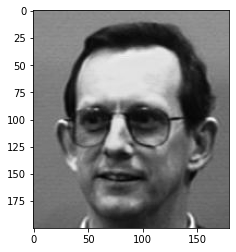

Pair  2


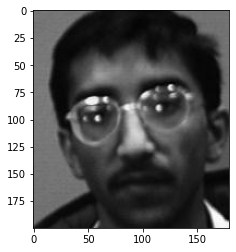

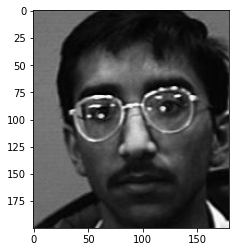

Pair  3


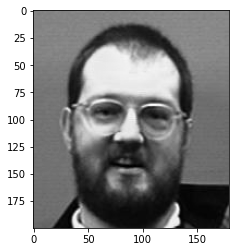

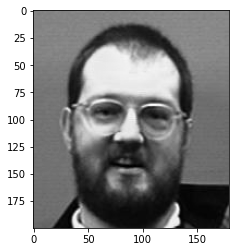

Pair  4


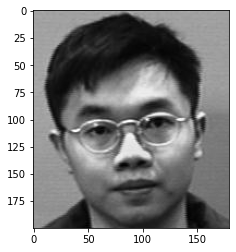

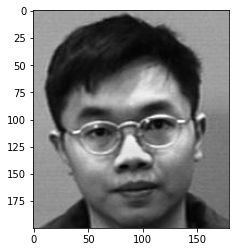

Pair  5


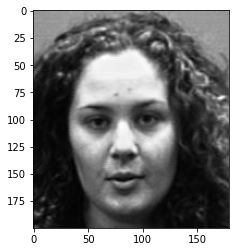

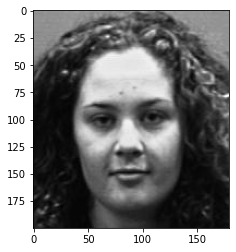

In [13]:
faces = FacialRec()
i = 1
for image_match in sample_faces(5):  #get 5 random faces
    print("Pair ", i)
    faces.match(image_match)  #run the match function to find the face they match to, then the function will plot both of them. 
    i +=1